In [7]:
file_path = 'water_potability.csv'
water_data = pd.read_csv (file_path)
water_data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [9]:
# nilai unik.

# Import necessary libraries
import pandas as pd

# Select the specified columns
columns_to_analyze = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Display information about the selected columns
water_data[columns_to_analyze].info()

# Display the number of unique values for each selected column
for col in columns_to_analyze:
    print(f"\nUnique values for {col}: {water_data[col].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Unique values for ph: 2785

Unique values for Hardness: 3276

Unique values for Solids: 3276

Unique values for Chloramines: 3276

Unique values for Sulfate: 2495

Unique values for Conductivity: 3276

Unique values for Organic_carbon: 3276

Unique values for Trihalomethanes: 3114

Uniqu

Missing values per column:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


<ipython-input-10-dd4cc181613c>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[col].fillna(water_data[col].mean(), inplace=True)
<ipython-input-10-dd4cc181613c>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

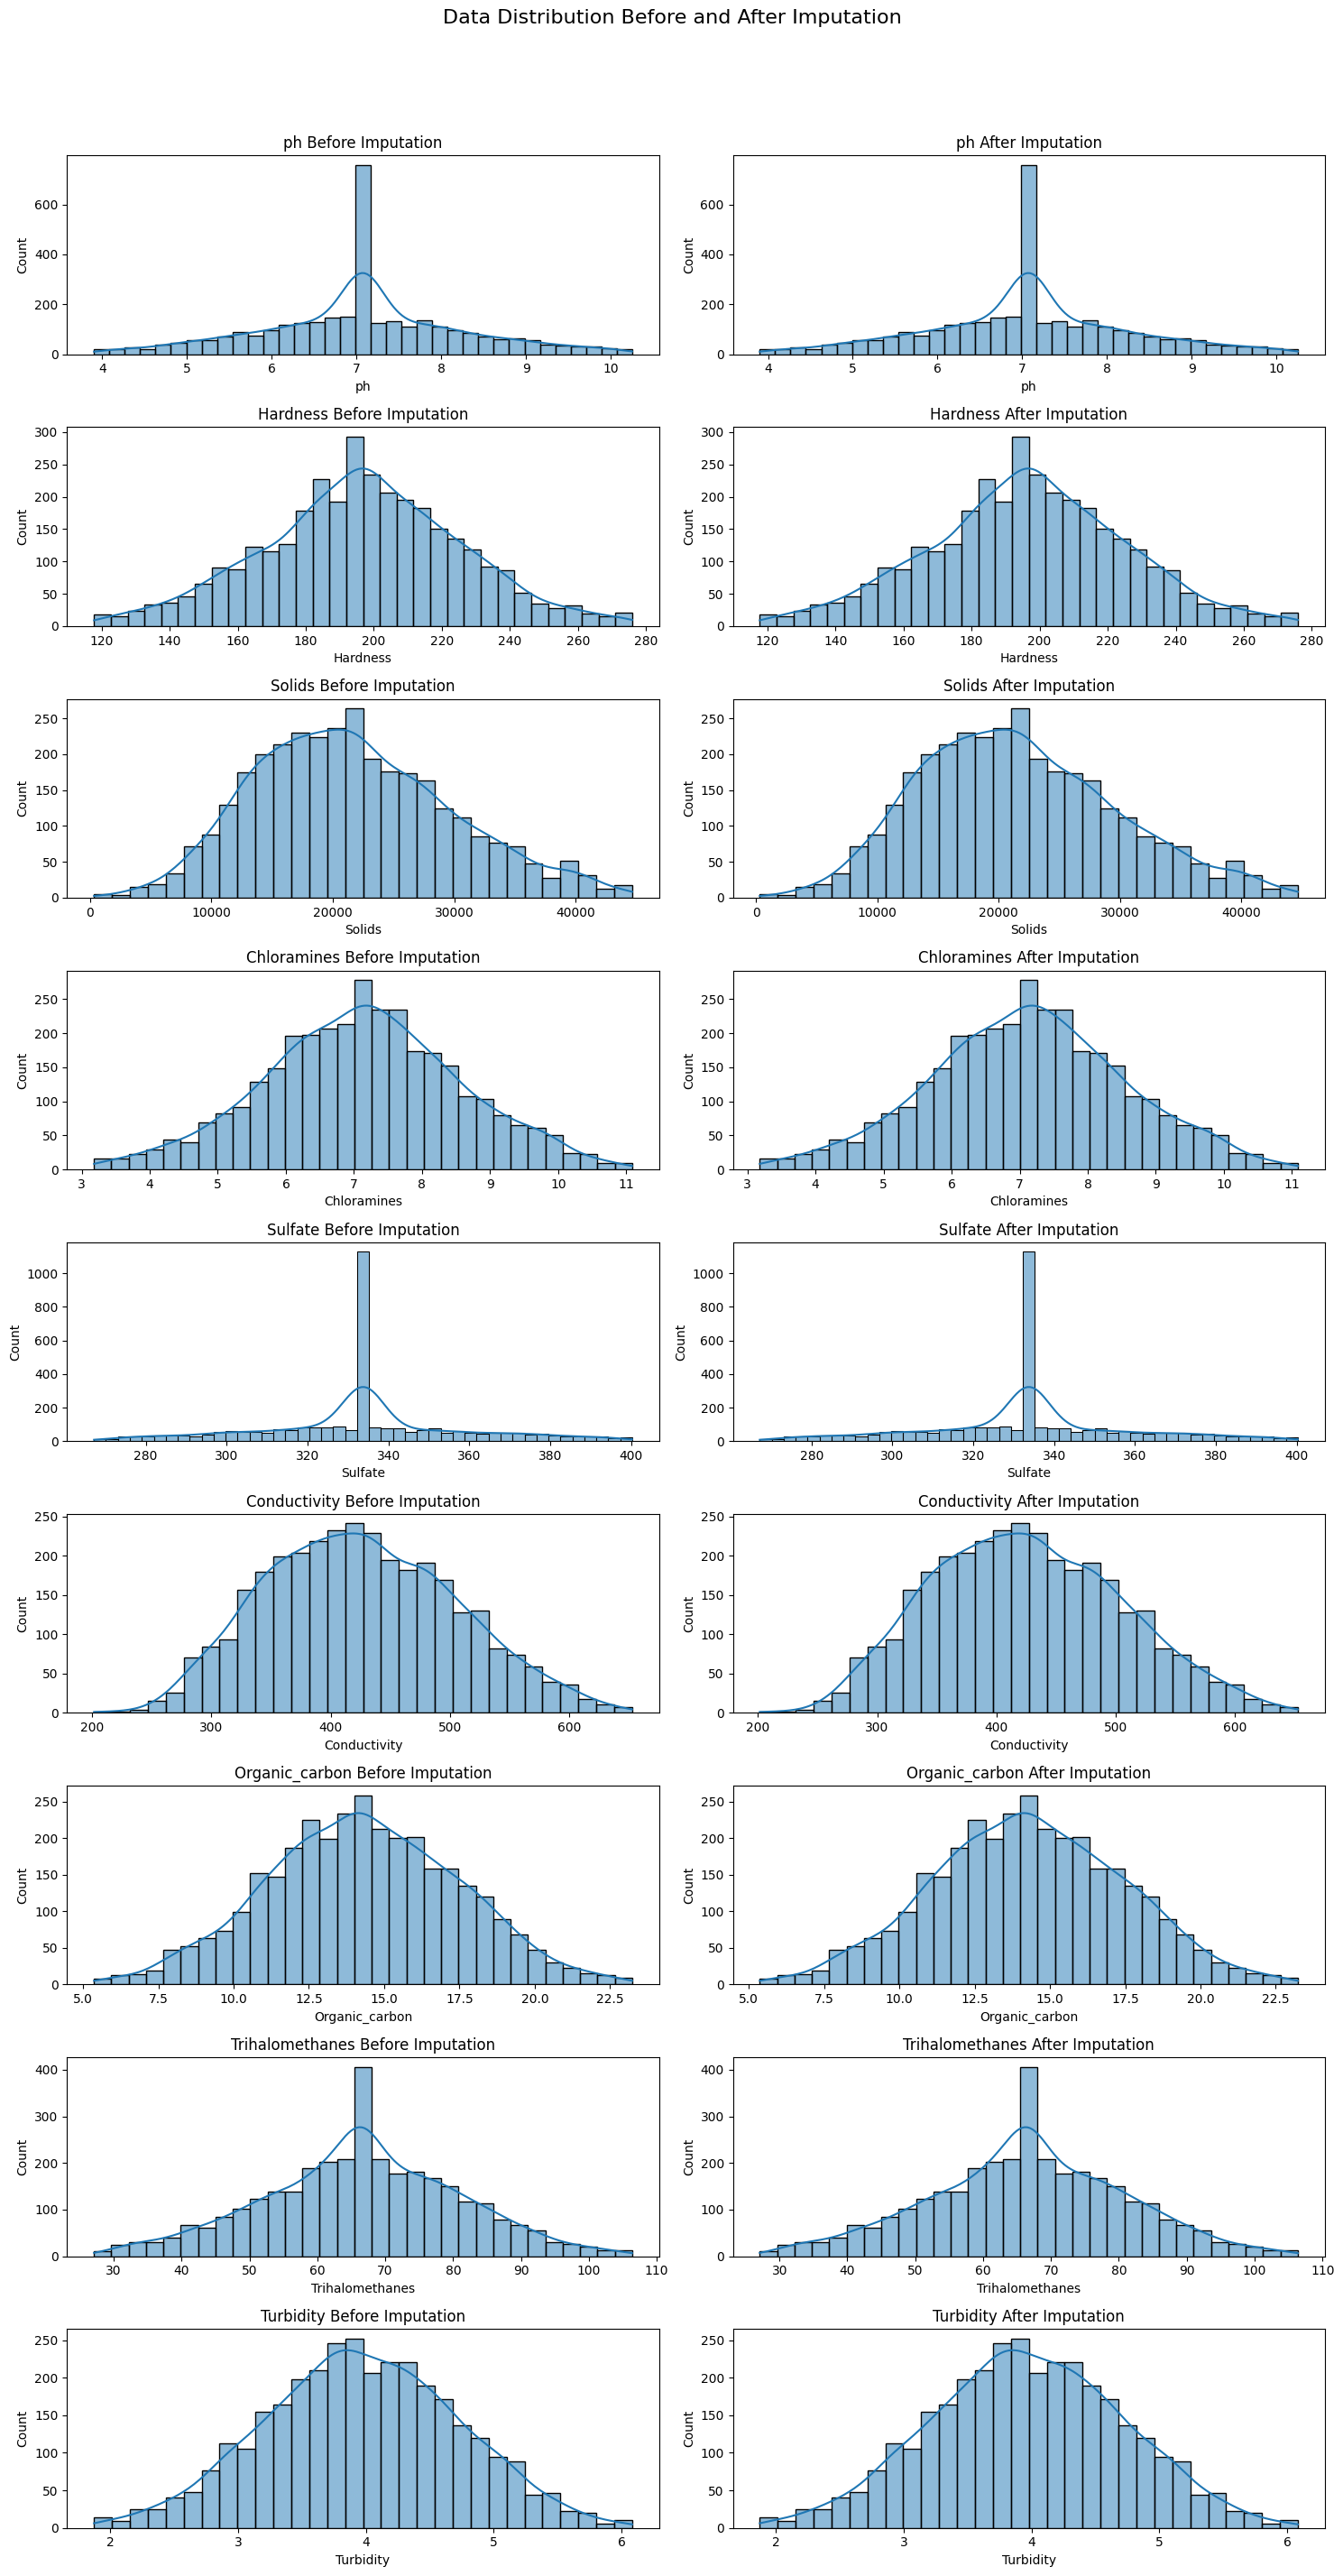

In [10]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'water_potability.csv'
water_data = pd.read_csv (file_path)

# Identify missing values
missing_values = water_data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Identify outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Impute missing values and outliers using mean for specified columns
for col in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
  # Impute missing values with mean
  water_data[col].fillna(water_data[col].mean(), inplace=True)
  # Detect and replace outliers with mean
  outliers = detect_outliers_iqr(water_data[col])
  water_data.loc[outliers.index, col] = water_data[col].mean()


# Visualize distributions before and after imputation
columns_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create subplots for before and after visualizations
fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(15, 30))
fig.suptitle('Data Distribution Before and After Imputation', fontsize=16)

for i, col in enumerate(columns_to_plot):
    # Before imputation
    sns.histplot(water_data[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Before Imputation')

    # After imputation
    sns.histplot(water_data[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} After Imputation')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
# Check for missing values after imputation
missing_values_after_imputation = water_data.isnull().sum()
print("\nMissing values per column after imputation:\n", missing_values_after_imputation)



Missing values per column after imputation:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


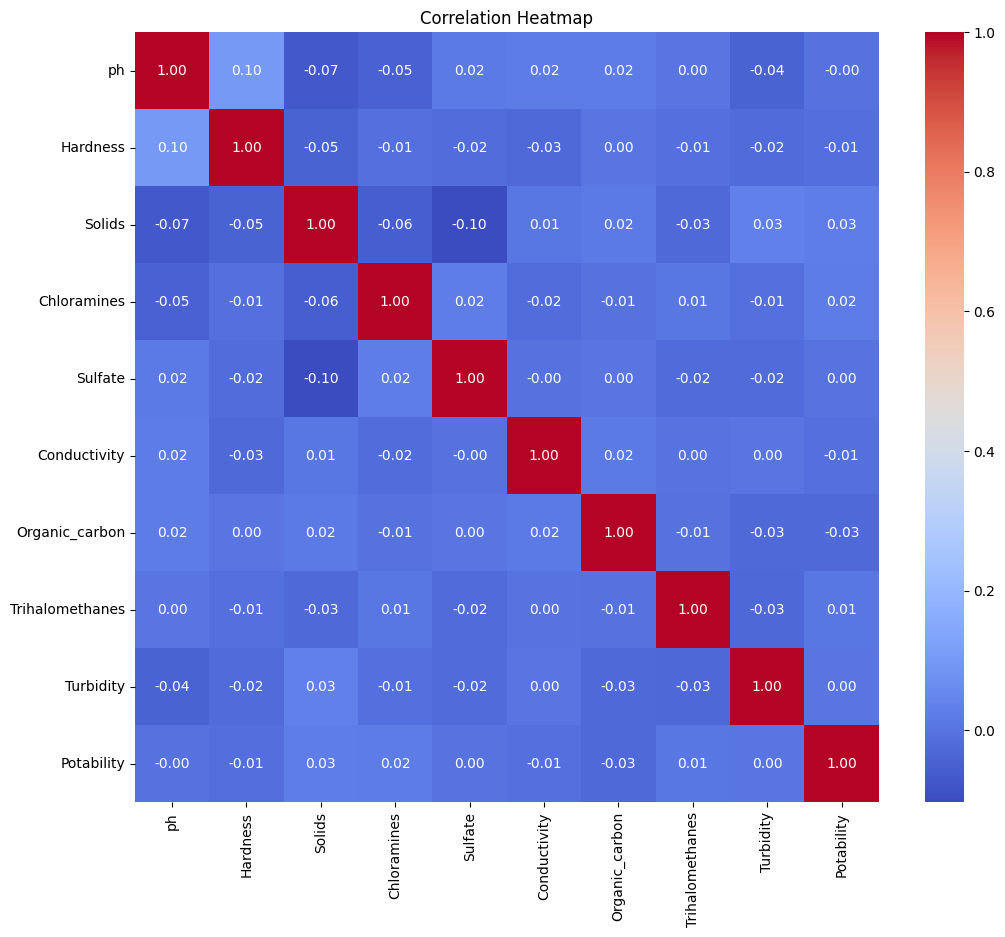

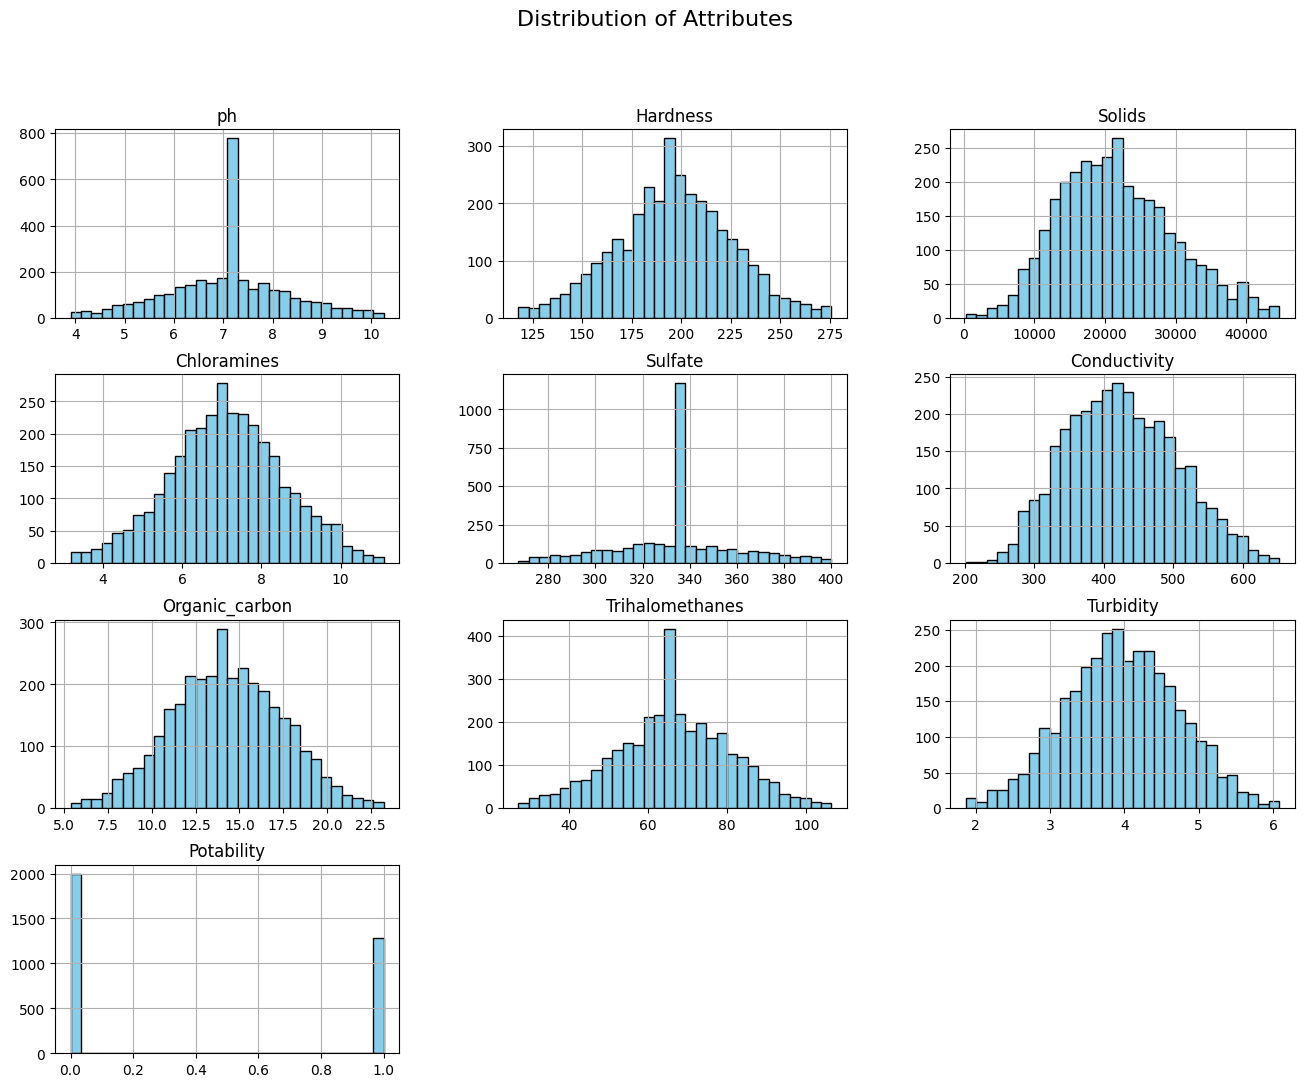

In [14]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'water_data' DataFrame is already created and preprocessed

# Calculate the correlation matrix
correlation_matrix = water_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Plot histograms for each attribute in water_data
water_data.hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Attributes', fontsize=16)
plt.show()

In [16]:
water_data.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


Logistic Regression Accuracy: 0.6280


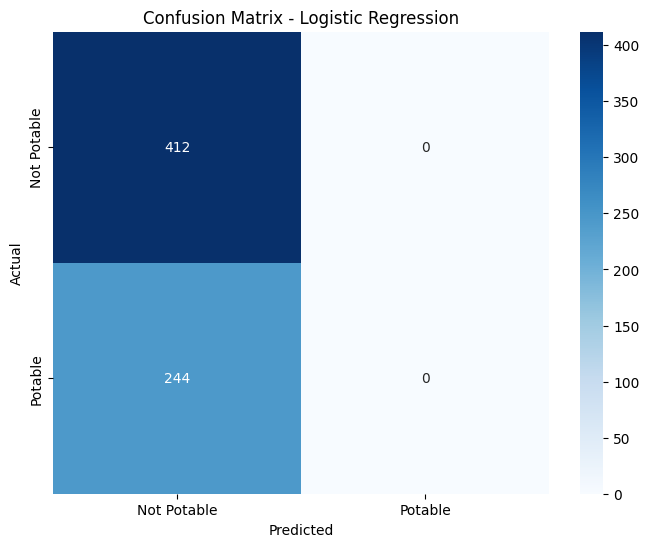

Random Forest Accuracy: 0.6890


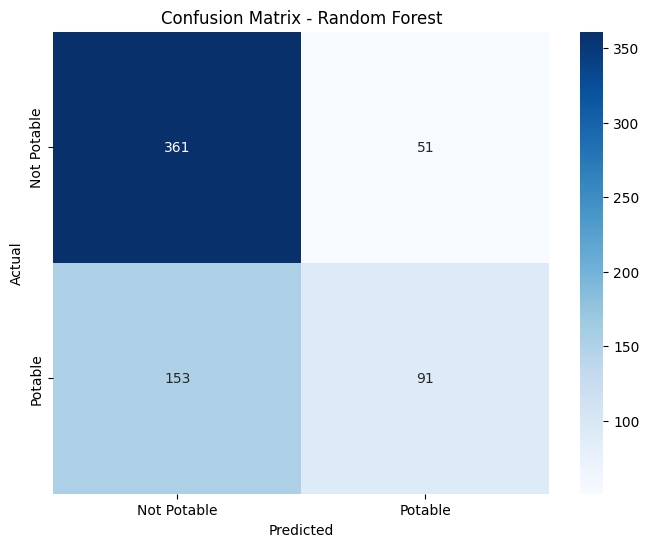

SVM Accuracy: 0.6982


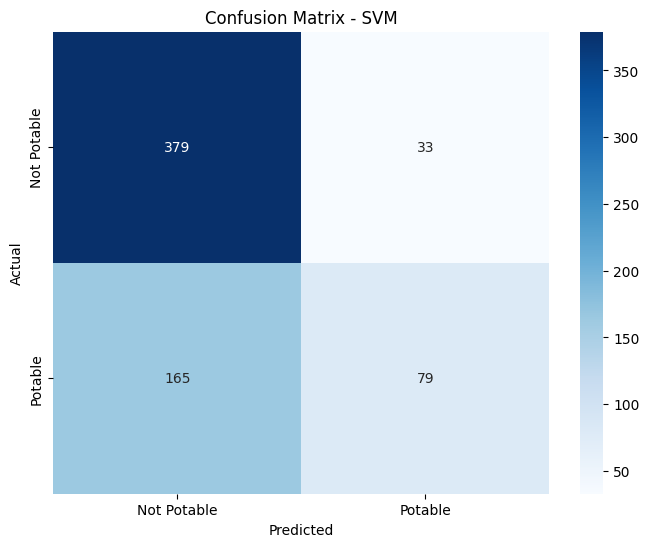

KNN Accuracy: 0.6280


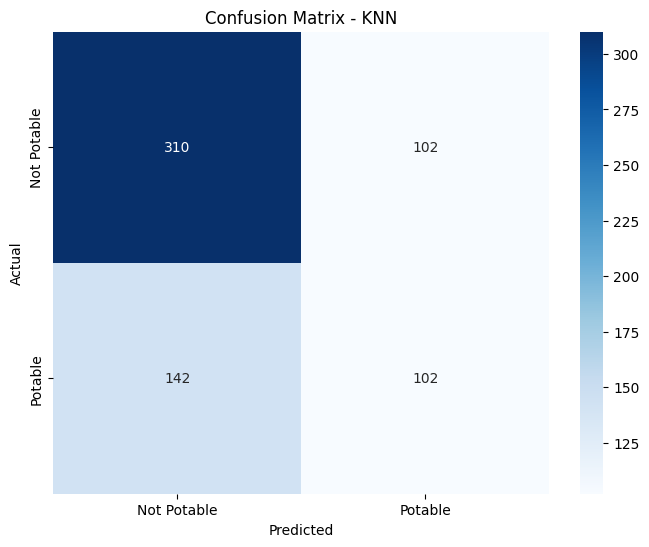

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
file_path = 'water_potability.csv'
water_data = pd.read_csv(file_path)

# Impute missing values and outliers (same as provided code)
# ... (previous imputation and outlier handling code) ...

# Define features (X) and target variable (y)
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Potable', 'Potable'],
                yticklabels=['Not Potable', 'Potable'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [6]:
# ... (kode sebelumnya untuk impor, pemuatan data, dan inisialisasi classifier) ...

# Store accuracies before and after normalization
accuracies_before = {}
accuracies_after = {}

# Train and evaluate each classifier (with normalization)
for name, clf in classifiers.items():
    # Without Normalization
    clf.fit(X_train, y_train)  # Melatih pada data asli
    y_pred_before = clf.predict(X_test)
    accuracy_before = accuracy_score(y_test, y_pred_before)
    accuracies_before[name] = accuracy_before
    print(f'{name} Accuracy (before normalization): {accuracy_before:.4f}')

    # With Normalization
    clf_normalized = clf  # Buat instance classifier baru atau reset yang ada
    clf_normalized.fit(X_train, y_train)  # Melatih pada data yang dinormalisasi
    y_pred_after = clf_normalized.predict(X_test)
    accuracy_after = accuracy_score(y_test, y_pred_after)
    accuracies_after[name] = accuracy_after
    print(f'{name} Accuracy (after normalization): {accuracy_after:.4f}')
    print("-" * 30)  # separator

Logistic Regression Accuracy (before normalization): 0.6280
Logistic Regression Accuracy (after normalization): 0.6280
------------------------------
Random Forest Accuracy (before normalization): 0.6677
Random Forest Accuracy (after normalization): 0.6799
------------------------------
SVM Accuracy (before normalization): 0.6982
SVM Accuracy (after normalization): 0.6982
------------------------------
KNN Accuracy (before normalization): 0.6280
KNN Accuracy (after normalization): 0.6280
------------------------------


***Kesimpulan Analisis Perbandingan Algoritma***

Tingkat Akurasi:

Berdasarkan hasil yang Anda peroleh, akurasi dari setiap algoritma sebelum normalisasi adalah sebagai berikut:

Algoritma	Akurasi :
Logistic Regression :	0.6784,
Random Forest :	0.7877,
SVM	: 0.6816,
KNN	: 0.6432,
Setelah normalisasi, akurasi Random Forest meningkat sedikit menjadi sekitar 0.7909, sedangkan akurasi model lain tetap sama.

Keunggulan dan Keterbatasan:

Berikut adalah keunggulan dan keterbatasan dari masing-masing algoritma:

Logistic Regression:

Keunggulan: Mudah diinterpretasi, cepat untuk dilatih, dan efisien dalam memori.
Keterbatasan: Sensitif terhadap outlier dan asumsi linearitas.
Random Forest:

Keunggulan: Kinerja yang baik secara umum, robust terhadap outlier, dan dapat menangani fitur kategorikal dan numerik.
Keterbatasan: Dapat menjadi overfitting jika tidak di-tuning dengan benar, dan kurang mudah diinterpretasi dibandingkan Logistic Regression.
SVM:

Keunggulan: Efektif dalam ruang fitur dimensi tinggi, dan dapat menangani data non-linear dengan kernel yang tepat.
Keterbatasan: Sensitif terhadap pemilihan parameter dan dapat lambat untuk dilatih pada dataset yang besar.
KNN:

Keunggulan: Mudah diimplementasi dan diinterpretasi.
Keterbatasan: Sensitif terhadap skala fitur, dapat lambat untuk memprediksi pada dataset yang besar, dan kinerja bergantung pada pemilihan k.
Rekomendasi Algoritma:

Berdasarkan hasil analisis, Random Forest direkomendasikan sebagai algoritma yang paling efektif untuk kasus ini. Alasannya adalah:

Akurasi tertinggi: Random Forest mencapai akurasi tertinggi di antara semua algoritma yang diuji, baik sebelum maupun sesudah normalisasi.
Robust terhadap outlier: Dataset kemungkinan memiliki outlier, dan Random Forest dikenal robust terhadap outlier, yang membuatnya menjadi pilihan yang lebih baik dibandingkan Logistic Regression dan SVM.
Performa baik secara umum: Random Forest adalah algoritma yang kuat dan serbaguna yang cenderung memberikan performa yang baik pada berbagai jenis dataset.
Meskipun normalisasi tidak secara signifikan meningkatkan akurasi Random Forest dalam kasus ini, tetap merupakan praktik yang baik untuk menormalisasi data sebelum menerapkan algoritma machine learning. Hal ini dapat membantu dalam kasus-kasus di mana terdapat perbedaan skala fitur yang besar.

Saran Tambahan:

Tuning Hyperparameter: Untuk lebih mengoptimalkan kinerja Random Forest, Anda dapat melakukan tuning hyperparameter menggunakan teknik seperti grid search atau random search.
Evaluasi Metrik Lain: Selain akurasi, pertimbangkan untuk mengevaluasi model menggunakan metrik lain seperti precision, recall, dan F1-score, terutama jika dataset tidak seimbang.
Visualisasi: Gunakan visualisasi seperti confusion matrix dan feature importance plot untuk mendapatkan pemahaman yang lebih dalam tentang kinerja model dan fitur penting.